# Imports

In [139]:
from tqdm import tqdm
import KSAT_properties
import importlib
import numpy as np
importlib.reload(KSAT_properties)
import matplotlib.pyplot as plt

# Percentage Solved

In [152]:
M = [200, 300, 400, 500, 600]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)

100%|██████████| 5/5 [00:24<00:00,  4.82s/it]


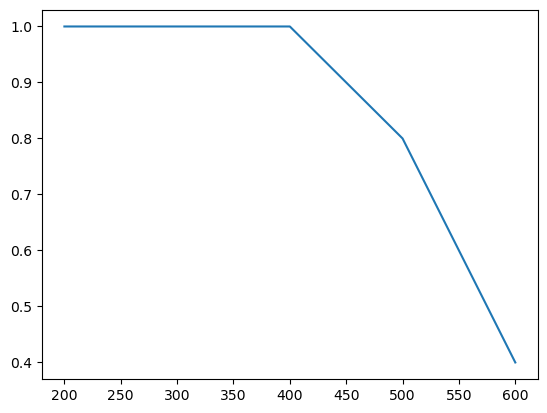

In [153]:
plt.plot(percentage_solved.keys(), percentage_solved.values())

In [80]:
percentage_solved

{200: 1.0,
 400: 0.8,
 500: 0.5333333333333333,
 600: 0.26666666666666666,
 700: 0.0,
 800: 0.0,
 900: 0.0,
 1000: 0.0}

# Algorithmic Threshold Analysis

In [93]:
N = [200,300,400,500,600]
M_alg = {}

  0%|          | 0/5 [01:27<?, ?it/s]


KeyboardInterrupt: 

In [96]:
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=1000)
    M_alg[n] = mid_M

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [08:02<00:00, 96.42s/it] 

0.4666666666666667 911


In [97]:
M_alg

{200: 606, 300: 775, 400: 775, 500: 909, 600: 911}

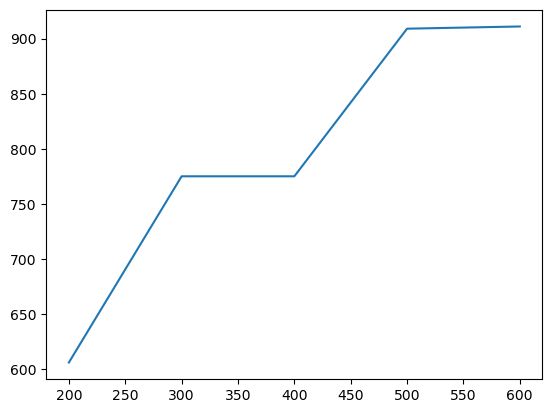

In [98]:
plt.plot(M_alg.keys(), M_alg.values())

# Curve collapse

In [145]:
N = np.array([200,300,400,500,600])
M = np.array(list(M_alg.values()))
alpha_values =  M/ N

In [147]:
alpha_values

array([3.03      , 2.58333333, 1.9375    , 1.818     , 1.51833333])

In [150]:
probabilities = {}
n = 200
for alpha in alpha_values:
    probabilities[alpha] = KSAT_properties.empirical_probability(M = int(round(alpha*n)), N = n)

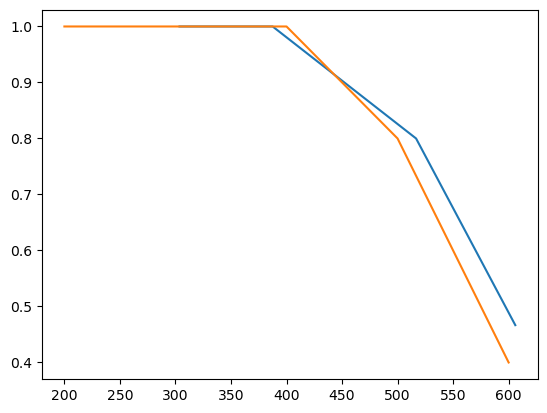

In [157]:
plt.plot(np.array(list(probabilities.keys())) * n, probabilities.values())
plt.plot(percentage_solved.keys(), percentage_solved.values())